In [19]:
import sys
import os
from pathlib import Path

sys.path.append(sys.path[0] + '/src')

In [20]:
import utils
import pandas as pd
from prediction import analyze_data, plot_count, count_data, plot_multi_count, part_task_analysis

In [21]:
device = utils.getting_device()

train_df =pd.read_csv('data/train_24892.csv')
test_df = pd.read_csv('data/test_13786.csv')
print(train_df.shape, test_df.shape)

device: cuda
(24892, 4) (13786, 4)


## Model: BERT, GPT2, RoBERTa

In [4]:
model = 'bert'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
bert_dic_lang, bert_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 0.40 seconds, Data predicted: 1
Time elapsed: 168.47 seconds, Data predicted: 5001
Time elapsed: 169.00 seconds, Data predicted: 10001
Accuracy of Programming Language prediction: 49.97%
Accuracy of Programming Task prediction: 20.03%


In [5]:
model = 'gpt'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
gpt_dic_lang, gpt_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 0.35 seconds, Data predicted: 1
Time elapsed: 164.92 seconds, Data predicted: 5001
Time elapsed: 170.00 seconds, Data predicted: 10001
Accuracy of Programming Language prediction: 34.38%
Accuracy of Programming Task prediction: 7.41%


In [6]:
model = 'roberta'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
roberta_dic_lang, roberta_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 0.33 seconds, Data predicted: 1
Time elapsed: 166.06 seconds, Data predicted: 5001
Time elapsed: 170.19 seconds, Data predicted: 10001
Accuracy of Programming Language prediction: 46.63%
Accuracy of Programming Task prediction: 14.65%


## Model: CodeBERT, CodeGPT

In [7]:
model = 'codebert'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
codebert_dic_lang, codebert_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 0.33 seconds, Data predicted: 1
Time elapsed: 169.48 seconds, Data predicted: 5001
Time elapsed: 160.47 seconds, Data predicted: 10001
Accuracy of Programming Language prediction: 46.79%
Accuracy of Programming Task prediction: 11.63%


In [8]:
model = 'codegpt'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
codegpt_dic_lang, codegpt_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 0.34 seconds, Data predicted: 1
Time elapsed: 168.33 seconds, Data predicted: 5001
Time elapsed: 175.44 seconds, Data predicted: 10001
Accuracy of Programming Language prediction: 57.26%
Accuracy of Programming Task prediction: 19.97%


## Model: Llama, Text-embedding-large-3

In [23]:
model = 'falcon7b'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
llama_dic_lang, llama_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 2.26 seconds, Data predicted: 1
Time elapsed: 966.33 seconds, Data predicted: 5001
Time elapsed: 963.33 seconds, Data predicted: 10001
Accuracy of Programming Language prediction: 60.62%
Accuracy of Programming Task prediction: 8.34%


In [9]:
model = 'llama'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
llama_dic_lang, llama_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 1.97 seconds, Data predicted: 1
Time elapsed: 835.97 seconds, Data predicted: 5001
Time elapsed: 810.79 seconds, Data predicted: 10001
Accuracy of Programming Language prediction: 65.17%
Accuracy of Programming Task prediction: 25.50%


In [22]:
model = 'llama7b'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
llama_dic_lang, llama_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 2.03 seconds, Data predicted: 1
Time elapsed: 901.80 seconds, Data predicted: 5001
Time elapsed: 894.32 seconds, Data predicted: 10001
Accuracy of Programming Language prediction: 66.41%
Accuracy of Programming Task prediction: 28.58%


In [10]:
model = 'text3'
train_file = 'out/'+model+'_24892.pt'
test_file = 'out/'+model+'_13786.pt'
text3_dic_lang, text3_dic_task = analyze_data(model, train_df, test_df, device, train_path = train_file, test_path = test_file, mode = 'two_label')

Time elapsed: 2.57 seconds, Data predicted: 1
Time elapsed: 1242.94 seconds, Data predicted: 5001
Time elapsed: 1271.57 seconds, Data predicted: 10001
Accuracy of Programming Language prediction: 53.51%
Accuracy of Programming Task prediction: 76.21%


## Histogram

In [11]:
import prediction
import importlib 
importlib.reload(prediction)

import utils
import pandas as pd
from prediction import analyze_data, plot_count, count_data, plot_multi_count

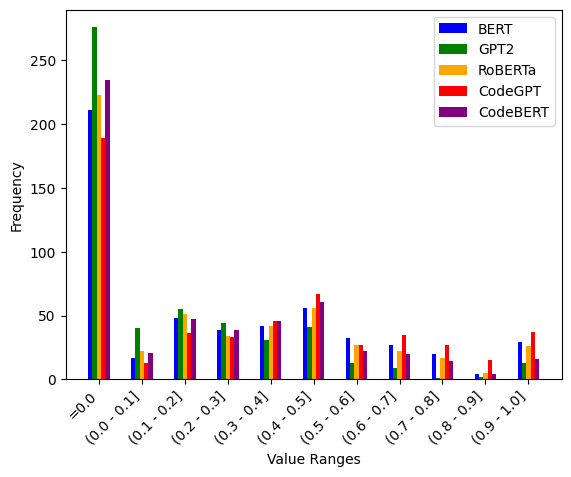

In [12]:
dataset_lang = [bert_dic_lang, gpt_dic_lang, roberta_dic_lang, codegpt_dic_lang, codebert_dic_lang]
data_labels = ['BERT', 'GPT2' , 'RoBERTa', 'CodeGPT' , 'CodeBERT']

counts = [count_data(data) for data in dataset_lang]
plot_multi_count(counts, data_labels, 'lang')

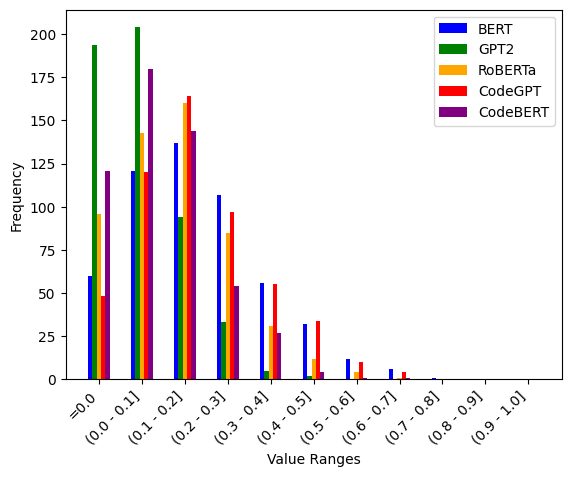

In [13]:
dataset_task = [bert_dic_task, gpt_dic_task, roberta_dic_task, codegpt_dic_task, codebert_dic_task]

counts = [count_data(data) for data in dataset_task]
plot_multi_count(counts, data_labels, 'task')

## Saving/Loading data from the pickle files

In [14]:
import pickle
for i in range(len(data_labels)):
    with open('out/lang_'+data_labels[i]+'.pkl', 'wb') as fp:
        pickle.dump(dataset_lang[i], fp)
    with open('out/task_'+data_labels[i]+'.pkl', 'wb') as fp:
        pickle.dump(dataset_task[i], fp)

In [15]:
import pickle

bert_dic_lang, gpt_dic_lang, roberta_dic_lang, codegpt_dic_lang, codebert_dic_lang = {}, {}, {}, {}, {}
bert_dic_task, gpt_dic_task, roberta_dic_task, codegpt_dic_task, codebert_dic_task  = {}, {}, {}, {}, {}
dataset_lang = [bert_dic_lang, gpt_dic_lang, roberta_dic_lang, codegpt_dic_lang, codebert_dic_lang]
dataset_task = [bert_dic_task, gpt_dic_task, roberta_dic_task, codegpt_dic_task, codebert_dic_task]
data_labels = ['BERT', 'GPT2' , 'RoBERTa' , 'CodeGPT' , 'CodeBERT']
for i in range(len(data_labels)):
    with open('out/lang_'+data_labels[i]+'.pkl', 'rb') as handle:
        dataset_lang[i] = pickle.load(handle)
    with open('out/task_'+data_labels[i]+'.pkl', 'rb') as handle:
        dataset_task[i] = pickle.load(handle)

## Two-Sample test

In [17]:
from scipy import stats
import numpy as np

data_labels = ['BERT', 'GPT2' ,'RoBERTa' , 'CodeGPT' , 'CodeBERT']

for i in range(len(data_labels)):
    model = data_labels[i]
    # Filter the dataset for the two species we want to compare:
    language_acc = np.array(list(dataset_lang[i].values()))
    task_acc = np.array(list(dataset_task[i].values()))

    res_lang = stats.shapiro(language_acc)
    res_task = stats.shapiro(task_acc)
    print('Model:{}, Language statistic: {}, Task statistic: {} '.format(model, res_lang.statistic, res_task.statistic))

Model:BERT, Language statistic: 0.8396320343017578, Task statistic: 0.9306209087371826 
Model:GPT2, Language statistic: 0.7213586568832397, Task statistic: 0.8225851058959961 
Model:RoBERTa, Language statistic: 0.8203132152557373, Task statistic: 0.914322018623352 
Model:CodeGPT, Language statistic: 0.8695927858352661, Task statistic: 0.9345391988754272 
Model:CodeBERT, Language statistic: 0.8148975372314453, Task statistic: 0.879680871963501 


In [18]:
import seaborn as sns
from scipy import stats
import numpy as np

data_labels = ['BERT', 'GPT2', 'RoBERTa' , 'CodeGPT' , 'CodeBERT' ]

for i in range(len(data_labels)):
    model = data_labels[i]
    # Filter the dataset for the two species we want to compare:
    language_acc = np.array(list(dataset_lang[i].values()))
    task_acc = np.array(list(dataset_task[i].values()))
    
    ## Perform the t-test:
    t_stat, p_value = stats.ttest_ind(language_acc, task_acc)
    print(model, 't_stat', t_stat, 'p_value', p_value)
    
    # Interpret the results:
    alpha = 0.05
    if p_value < alpha:
        print(": Reject the null hypothesis; there is a significant difference between the accuracy distribution of PL and PT")
    else:
        print(": Fail to reject the null hypothesis; there is no significant difference between the accuracy distribution of PL and PT")

BERT t_stat 5.8051974273846545 p_value 8.498430593906946e-09
: Reject the null hypothesis; there is a significant difference between the accuracy distribution of PL and PT
GPT2 t_stat 8.345778797928268 p_value 2.196980488180567e-16
: Reject the null hypothesis; there is a significant difference between the accuracy distribution of PL and PT
RoBERTa t_stat 8.36394904227269 p_value 1.9016338541967634e-16
: Reject the null hypothesis; there is a significant difference between the accuracy distribution of PL and PT
CodeGPT t_stat 9.284854550587255 p_value 8.950741725264139e-20
: Reject the null hypothesis; there is a significant difference between the accuracy distribution of PL and PT
CodeBERT t_stat 9.315616428126381 p_value 6.850605853949738e-20
: Reject the null hypothesis; there is a significant difference between the accuracy distribution of PL and PT
